# Question 1

In [1]:
# Principal Component Analysis
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def standardize(df1):
    scaler=StandardScaler()
    df1=scaler.fit_transform(df1)
    return pd.DataFrame(df1)


# define a matrix
A = standardize(np.array([[8,14,3],[13,9,6],[4,3,15],[7,2,1],[19,8,4],[5,18,11]]))

# create the PCA instance
pca = PCA(1)

# fit on data
pca.fit(A)

# transform data
B = pca.transform(A)
print('Final answer:')
print(B)

Final answer:
[[-0.20423593]
 [-0.58697404]
 [ 1.74081123]
 [-0.71095189]
 [-1.70802694]
 [ 1.46937756]]


# Question 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings('ignore')

In [3]:
def standardize(df1):
    scaler=StandardScaler()
    df1=scaler.fit_transform(df1)
    return pd.DataFrame(df1)

In [4]:
def pca_func(data):
  pca = PCA(n_components=2,svd_solver='full')
  pca=pca.fit(data)

  #Transform data to 2D
  data_encoded=pca.transform(data)

  #Regenerate 3D data from 2 features
  data_decoded=pd.DataFrame(pca.inverse_transform(data_encoded))
  comp=pca.components_

  #Principal components
  print('Components:')
  print(comp)

  #Plot original data
  fig = plt.figure(figsize=[8,5])
  ax = plt.axes(projection='3d')
  ax.plot3D(data[0],data[1], data[2],'gray')
  for i in range(len(pca.components_)):
      exp_var = pca.explained_variance_[i]
      component = pca.components_[i]
      p_component_with_length = component*3*np.sqrt(exp_var)
      PC = list(zip(pca.mean_,pca.mean_ + p_component_with_length))
      ax.plot(PC[0],PC[1],PC[2],'k')
  plt.title('Original standardized data')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  plt.show()

  #Plot regained data after performing PCA
  fig = plt.figure(figsize=[8,5])
  ax = plt.axes(projection='3d')
  ax.plot3D(data_decoded[0],data_decoded[1], data_decoded[2],'gray')
  for i in range(len(pca.components_)):
      exp_var = pca.explained_variance_[i]
      component = pca.components_[i]
      p_component_with_length = component*3*np.sqrt(exp_var)
      PC = list(zip(pca.mean_,pca.mean_ + p_component_with_length))
      ax.plot(PC[0],PC[1],PC[2],'k')
  plt.title('Regained data')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  plt.show()

  #Plot 2D figure
  plt.scatter(data_encoded[:,0],data_encoded[:,1])
  plt.axhline(y=0,color='k')
  plt.axvline(x=0,color='k')
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.title('2D transformed data')
  plt.grid(True)
  plt.show()

  #Calculate error
  rmse = mse(data, data_decoded, squared=False)
  print('RMSE between original and regained data after PCA: ',rmse)

  r2 = r2_score(data, data_decoded)
  print('R2_score between original and regained data after PCA: ',r2)

In [6]:
#Read data
data1 = pd.read_csv('P_1.txt', sep=" ", header=None)
data2 = pd.read_csv('P_2.txt', sep=" ", header=None)
data3 = pd.read_csv('P_3.txt', sep=" ", header=None)
data4 = pd.read_csv('P_4.txt', sep=" ", header=None)
data5 = pd.read_csv('P_5.txt', sep=" ", header=None)

In [7]:
#Standardize the data for performing PCA
data1=standardize(data1)
data2=standardize(data2)
data3=standardize(data3)
data4=standardize(data4)
data5=standardize(data5)
cols=data1.columns

In [8]:
data1.head()

,0,1,2
0,0.815756,1.708647,-0.345913
1,0.815759,1.600698,-0.206823
2,0.815768,1.252523,0.115454
3,0.827666,1.380933,0.016475
4,0.819393,1.458677,-0.062880


Components:
[[-0.71246365 -0.20299258 -0.67170645]
 [ 0.04283359  0.94287758 -0.33037427]]


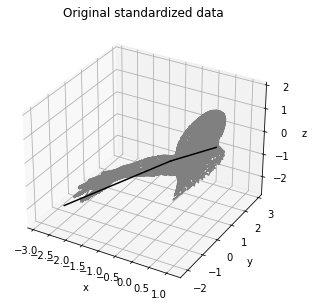

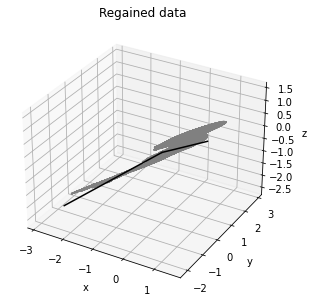

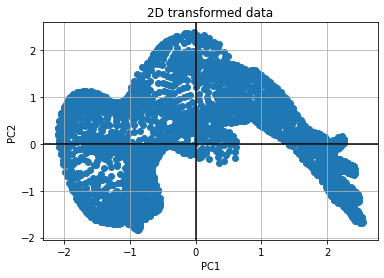

RMSE between original and regained data after PCA:  0.20932171277407843
R2_score between original and regained data after PCA:  0.950381655995482


In [9]:
pca_func(data1)

Components:
[[ 0.59413162 -0.59119126  0.54543608]
 [ 0.36228137 -0.40874788 -0.83766185]]


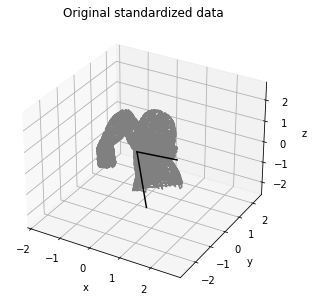

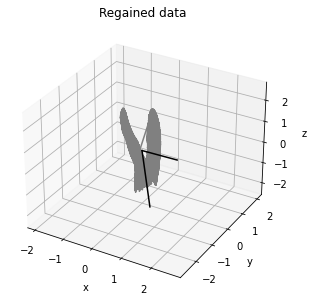

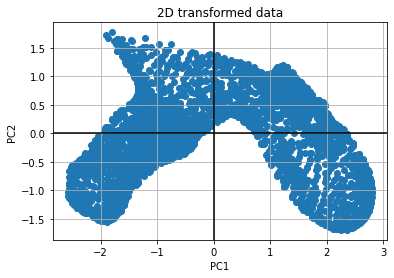

RMSE between original and regained data after PCA:  0.2751576087529534
R2_score between original and regained data after PCA:  0.8907851046201025


In [10]:
pca_func(data2)

Components:
[[ 0.63511685  0.55243544 -0.53985338]
 [ 0.02572969  0.68339641  0.72959395]]


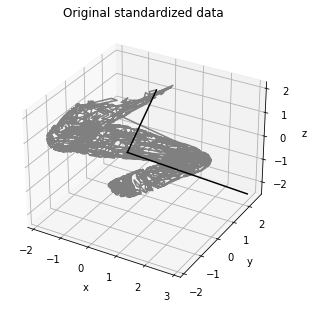

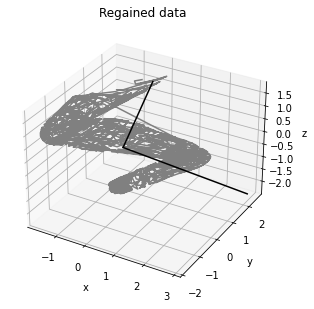

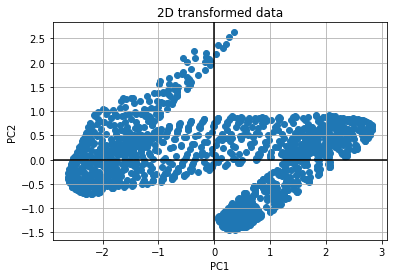

RMSE between original and regained data after PCA:  0.20930936203228664
R2_score between original and regained data after PCA:  0.9528213543671115


In [11]:
pca_func(data3)

Components:
[[ 0.59136935 -0.58434117  0.55572268]
 [-0.3156906   0.46637798  0.8263359 ]]


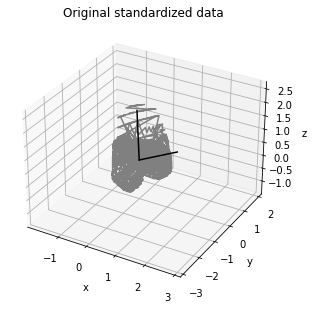

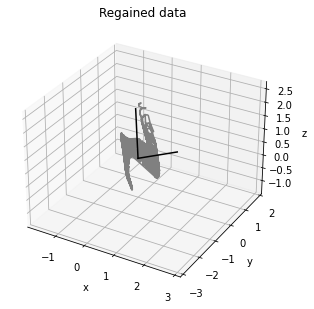

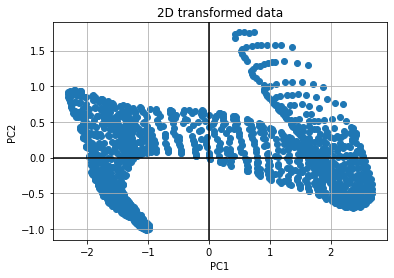

RMSE between original and regained data after PCA:  0.1733313456288358
R2_score between original and regained data after PCA:  0.959806491744548


In [12]:
pca_func(data4)

Components:
[[ 0.7130749  -0.22655321  0.66347406]
 [-0.04082255  0.93132659  0.36188991]]


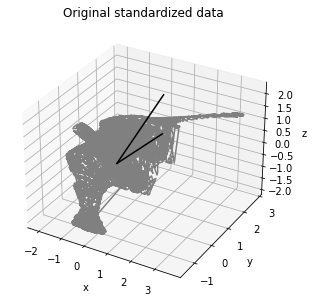

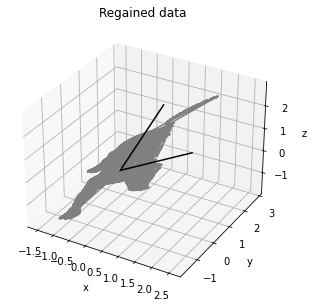

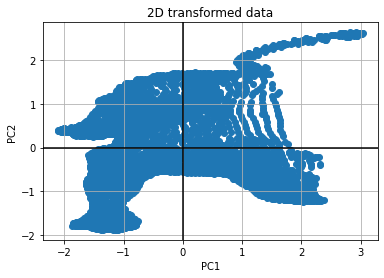

RMSE between original and regained data after PCA:  0.4150057723997296
R2_score between original and regained data after PCA:  0.8078689517602364


In [13]:
pca_func(data5)

# Question 3

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
from  sklearn.metrics  import  mean_squared_error  as mse

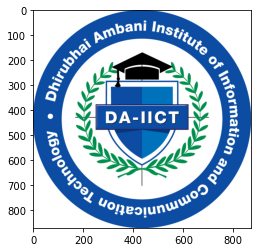

(870, 870, 3)


In [15]:
img = cv2.cvtColor(cv2.imread('da_image.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print(img.shape)

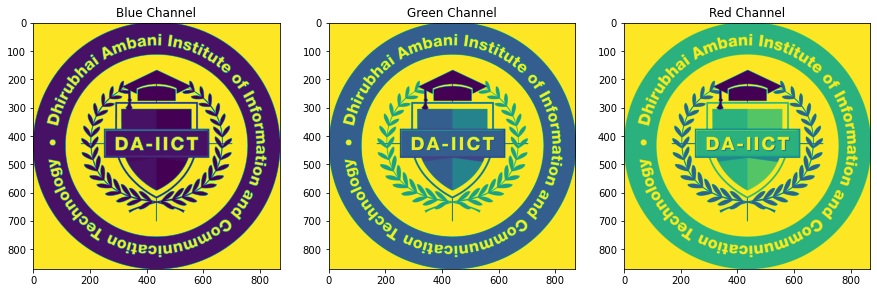

In [16]:
#Splitting into channels
blue,green,red = cv2.split(img)

# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [17]:
# ensuring data is between 0 to 1
df_blue = blue/255
df_green = green/255
df_red = red/255

In [18]:
blue_variance_ratios = []
green_variance_ratios = []
red_variance_ratios = []

# Doing PCA for all 3 channels
for i in range(10,870,10):
  pca_b = PCA(n_components=i)
  pca_b.fit(df_blue)
  pca_g = PCA(n_components=i)
  pca_g.fit(df_green)
  pca_r = PCA(n_components=i)
  pca_r.fit(df_red)
  trans_pca_b = pca_b.transform(df_blue)
  trans_pca_g = pca_b.transform(df_green)
  trans_pca_r = pca_b.transform(df_red)
  blue_variance_ratios.append(sum(pca_b.explained_variance_ratio_))
  green_variance_ratios.append(sum(pca_g.explained_variance_ratio_))
  red_variance_ratios.append(sum(pca_r.explained_variance_ratio_))

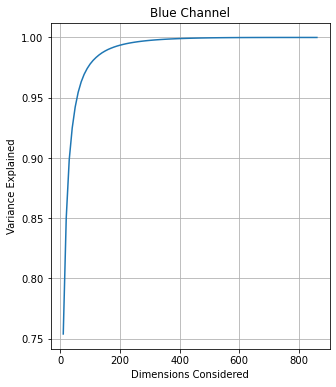

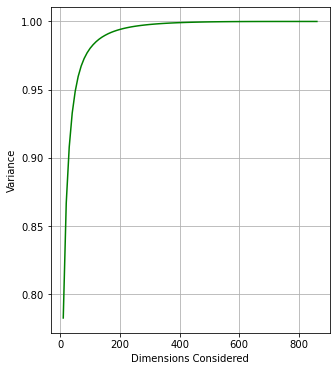

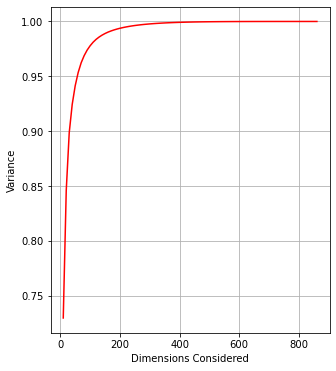

In [19]:
x_line = []
for i in range(10,870,10):
  x_line.append(i)
# plt.plot(x_line,b_variances)
fig = plt.figure(figsize = (5, 6)) 
plt.title("Blue Channel")
plt.xlabel("Dimensions Considered")
plt.ylabel("Variance Explained")
plt.plot(x_line,blue_variance_ratios)
plt.grid()
plt.show()
fig = plt.figure(figsize = (5, 6)) 
plt.xlabel("Dimensions Considered")
plt.ylabel("Variance Explained")
plt.ylabel("Variance")
plt.plot(x_line,green_variance_ratios,color='green')
plt.grid()
plt.show()
fig = plt.figure(figsize = (5, 6)) 
plt.xlabel("Dimensions Considered")
plt.ylabel("Variance Explained")
plt.ylabel("Variance")
plt.plot(x_line,red_variance_ratios,color='red')
plt.grid()
plt.show()

In [20]:
def CompressAndDisplayImage(dimensions):
  pca_b = PCA(n_components=dimensions)
  pca_b.fit(df_blue)
  trans_pca_b = pca_b.transform(df_blue)
  pca_g = PCA(n_components=dimensions)
  pca_g.fit(df_green)
  trans_pca_g = pca_g.transform(df_green)
  pca_r = PCA(n_components=dimensions)
  pca_r.fit(df_red)
  trans_pca_r = pca_r.transform(df_red)

  print(f"Blue Channel Variance: {sum(pca_b.explained_variance_ratio_)}")
  print(f"Green Channel Variance: {sum(pca_g.explained_variance_ratio_)}")
  print(f"Red Channel Variance: {sum(pca_r.explained_variance_ratio_)}")

  b_arr = pca_b.inverse_transform(trans_pca_b)
  g_arr = pca_g.inverse_transform(trans_pca_g)
  r_arr = pca_r.inverse_transform(trans_pca_r)

  img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))

  fig = plt.figure(figsize = (10, 7.2)) 
  #fig.add_subplot(121)
  #plt.title("Original Image")
  #plt.imshow(img)
  fig.add_subplot(122)
  plt.title(f'Post PCA ({dimensions} dimensions)')
  plt.imshow(img_reduced)
  plt.show()
    
  # RMSE
  print(mse(df_blue , b_arr , squared=False))
  print(mse(df_green , g_arr , squared=False))
  print(mse(df_red , r_arr , squared=False))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Blue Channel Variance: 0.9935687547232358
Green Channel Variance: 0.994166047247764
Red Channel Variance: 0.9937969493805702


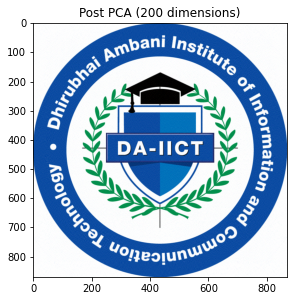

0.03628004427353385
0.02515552819283973
0.01751250756201763


In [21]:
CompressAndDisplayImage(200)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Blue Channel Variance: 0.9779560893942266
Green Channel Variance: 0.9803131154788034
Red Channel Variance: 0.9778515057588882


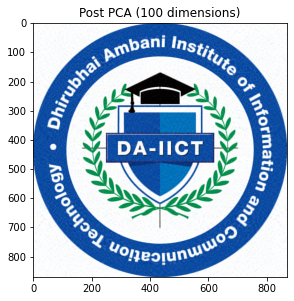

0.06706674344580385
0.04614040326195448
0.032933791922089256


In [22]:
CompressAndDisplayImage(100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Blue Channel Variance: 0.9423027921342878
Green Channel Variance: 0.9487316526705102
Red Channel Variance: 0.9413760017572107


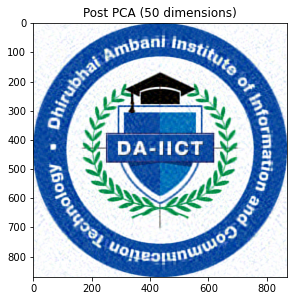

0.10836168667325924
0.07451492103451238
0.053227920379607


In [23]:
CompressAndDisplayImage(50)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Blue Channel Variance: 0.7538841979922859
Green Channel Variance: 0.7825686607248364
Red Channel Variance: 0.7297300334296664


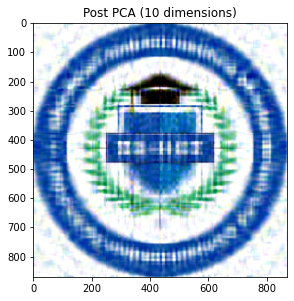

0.22337043307615206
0.15282443610078014
0.11343913357069701


In [24]:
CompressAndDisplayImage(10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Blue Channel Variance: 0.6288644180996397
Green Channel Variance: 0.6555120231603841
Red Channel Variance: 0.5761178869819079


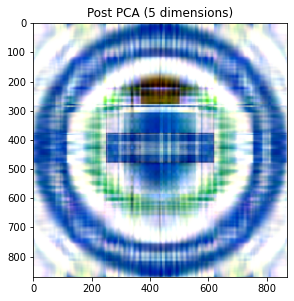

0.27562720893647547
0.1933484972973848
0.14168458672208054


In [25]:
CompressAndDisplayImage(5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Blue Channel Variance: 0.3832129939545571
Green Channel Variance: 0.42068274651317994
Red Channel Variance: 0.33822686728696794


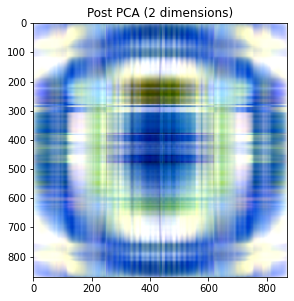

0.35666386847059695
0.25296463956557924
0.17782140978491962


In [26]:
CompressAndDisplayImage(2)

# Question 4

In [ ]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [81]:
f = h5py.File('faceimages.mat','r')
data = f.get('data')
data = np.array(data).T
labels = data[:,-1]
data = data[:,:-1]

In [83]:
data.shape

(400, 10304)

In [84]:
np.unique(labels)

array([0., 1.])

In [85]:
data = data - np.mean(data, axis = 0)
data.shape

(400, 10304)

In [86]:
pca = PCA()
pca.fit_transform(data.T)
pca_variance_ratio = pca.explained_variance_ratio_
pca_variance_ratio.shape

(400,)

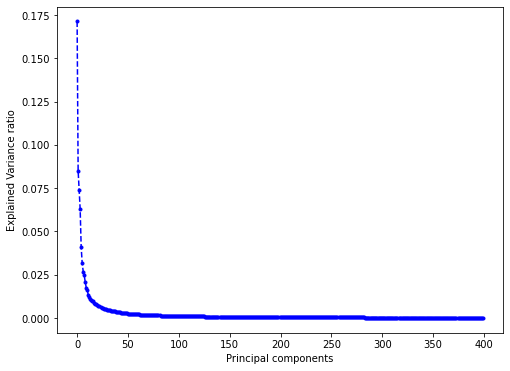

In [87]:
plt.figure(figsize=(8, 6))
plt.plot(pca_variance_ratio, 'b.--')
plt.ylabel('Explained Variance ratio')
plt.xlabel('Principal components')
plt.show()

$$Covariance  = \frac{(X-\mu)^T(X-\mu)}{m-1}$$

In [88]:
cov_matrix = (np.dot(data.T,data))/(np.size(data,0)-1)
cov_matrix.shape

(10304, 10304)

In [89]:
cov_matrix

array([[1279.32656015, 1268.83255639, 1259.75737469, ...,   21.6276817 ,
          -2.07218045,  -58.63463033],
       [1268.83255639, 1264.08210526, 1257.36784461, ...,   18.08466165,
          -5.59197995,  -62.75155388],
       [1259.75737469, 1257.36784461, 1255.29693609, ...,   18.8168797 ,
          -4.37694236,  -59.17181078],
       ...,
       [  21.6276817 ,   18.08466165,   18.8168797 , ..., 1704.12428571,
        1668.79298246, 1615.49001253],
       [  -2.07218045,   -5.59197995,   -4.37694236, ..., 1668.79298246,
        1777.20802005, 1780.6726817 ],
       [ -58.63463033,  -62.75155388,  -59.17181078, ..., 1615.49001253,
        1780.6726817 , 1939.41698622]])

In [90]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues.shape, eigenvectors.shape

((10304,), (10304, 10304))

In [91]:
eigenvalues

array([ 2.82472210e+06+0.j,  2.07070497e+06+0.j,  1.09741090e+06+0.j, ...,
        8.38849021e-14+0.j,  1.51450389e-13+0.j, -1.87953871e-13+0.j])

In [92]:
eigenvectors

array([[-2.16540447e-03+0.j,  1.46234340e-02+0.j,  1.99221269e-02+0.j,
        ..., -8.35045609e-04+0.j, -2.69449325e-04+0.j,
        -1.84997120e-03+0.j],
       [-2.06455802e-03+0.j,  1.45967027e-02+0.j,  1.98194696e-02+0.j,
        ..., -8.97145554e-06+0.j, -1.13613156e-05+0.j,
        -2.06512028e-04+0.j],
       [-2.02715357e-03+0.j,  1.45742421e-02+0.j,  1.97707151e-02+0.j,
        ..., -8.25820974e-05+0.j, -2.02516641e-05+0.j,
        -6.27726384e-05+0.j],
       ...,
       [-6.12757175e-03+0.j, -7.07647138e-03+0.j,  1.60756344e-02+0.j,
        ...,  1.25964067e-02+0.j,  1.24307967e-02+0.j,
        -1.23672510e-02+0.j],
       [-6.98050247e-03+0.j, -7.71548293e-03+0.j,  1.60106270e-02+0.j,
        ..., -4.22769494e-03+0.j,  7.01481785e-03+0.j,
        -4.69811558e-03+0.j],
       [-7.28133220e-03+0.j, -8.90895920e-03+0.j,  1.48817774e-02+0.j,
        ..., -4.04100025e-03+0.j,  6.63946748e-03+0.j,
         8.62197999e-03+0.j]])

In [93]:
def n_compPCA(feat, n_comp):
    pca = PCA(n_components=n_comp)
    pca_feat_trans = pca.fit_transform(feat)
    print('Explained variance ratio: ', sum(pca.explained_variance_ratio_))
    return pca

n_components = 5

In [183]:
pca = n_compPCA(data, 5)

Explained variance ratio:  0.4805252990232835


In [184]:
trans_data = pca.inverse_transform(pca.fit_transform(data))

In [185]:
trans_data.shape

(400, 10304)

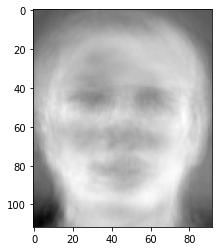

In [186]:
plt.imshow(trans_data[0].reshape((92, 112)).T, cmap=plt.cm.gray)
plt.show()

In [187]:
reconstruction_error = mean_squared_error(data, trans_data, squared=False)
print(reconstruction_error)

28.40129386672304


n_components = 10

In [178]:
pca = n_compPCA(data, 10)

Explained variance ratio:  0.5995922299709523


In [179]:
trans_data = pca.inverse_transform(pca.fit_transform(data))

In [180]:
trans_data.shape

(400, 10304)

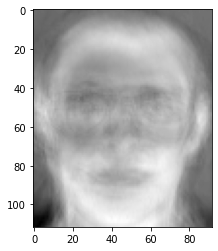

In [181]:
plt.imshow(trans_data[0].reshape((92, 112)).T, cmap=plt.cm.gray)
plt.show()

In [182]:
reconstruction_error = mean_squared_error(data, trans_data, squared=False)
print(reconstruction_error)

24.93487401609749


n_components = 50

In [173]:
pca = n_compPCA(data, 50)

Explained variance ratio:  0.8158293187369482


In [174]:
trans_data = pca.inverse_transform(pca.fit_transform(data))

In [175]:
trans_data.shape

(400, 10304)

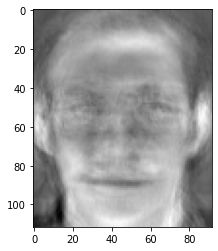

In [176]:
plt.imshow(trans_data[0].reshape((92, 112)).T, cmap=plt.cm.gray)
plt.show()

In [177]:
reconstruction_error = mean_squared_error(data, trans_data, squared=False)
print(reconstruction_error)

16.91369045588969


n_components = 100

In [168]:
pca = n_compPCA(data, 100)

Explained variance ratio:  0.8899506478211817


In [169]:
trans_data = pca.inverse_transform(pca.fit_transform(data))

In [170]:
trans_data.shape

(400, 10304)

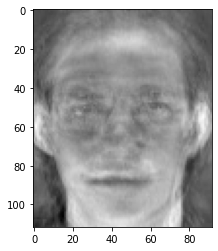

In [171]:
plt.imshow(trans_data[0].reshape((92, 112)).T, cmap=plt.cm.gray)
plt.show()

In [172]:
reconstruction_error = mean_squared_error(data, trans_data, squared=False)
print(reconstruction_error)

13.062881066684977


n_components = 400

In [160]:
pca = n_compPCA(data, 400)

Explained variance ratio:  0.9999999999999998


In [161]:
trans_data = pca.inverse_transform(pca.fit_transform(data))

In [162]:
trans_data.shape

(400, 10304)

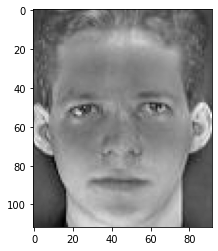

In [163]:
plt.imshow(trans_data[0].reshape((92, 112)).T, cmap=plt.cm.gray)
plt.show()

In [167]:
reconstruction_error = mean_squared_error(data, trans_data, squared=False)
print(reconstruction_error)

1.2658483227975867e-13


# Question 5

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [28]:
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target
normalizedData = StandardScaler().fit_transform(x)
print(normalizedData.shape)

(70000, 784)


In [29]:
pca = decomposition.PCA()
pca.n_components = 784
pca_data = pca.fit_transform(normalizedData)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_) * 100
cum_var_explained = np.cumsum(percentage_var_explained)


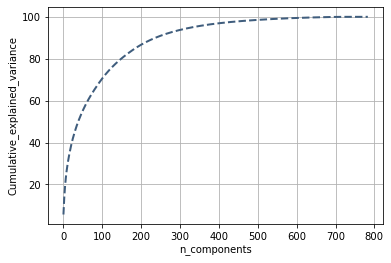

In [30]:
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2, linestyle='--',color = '#3F5D7D')
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [31]:
pca = decomposition.PCA(n_components=0.85)
principalComponents = pca.fit_transform(normalizedData)
print("Net % Variance explained by Principal Components is :" + str(sum(pca.explained_variance_ratio_)*100))
print("No of components to explain " + str(85)+"% Variance is" ,pca.explained_variance_ratio_.shape)

Net % Variance explained by Principal Components is :85.01423243663399
No of components to explain 85% Variance is (186,)
